### RMSPROP, ADAGRAD, MOMENTUM, NESTEROV, ADAM  

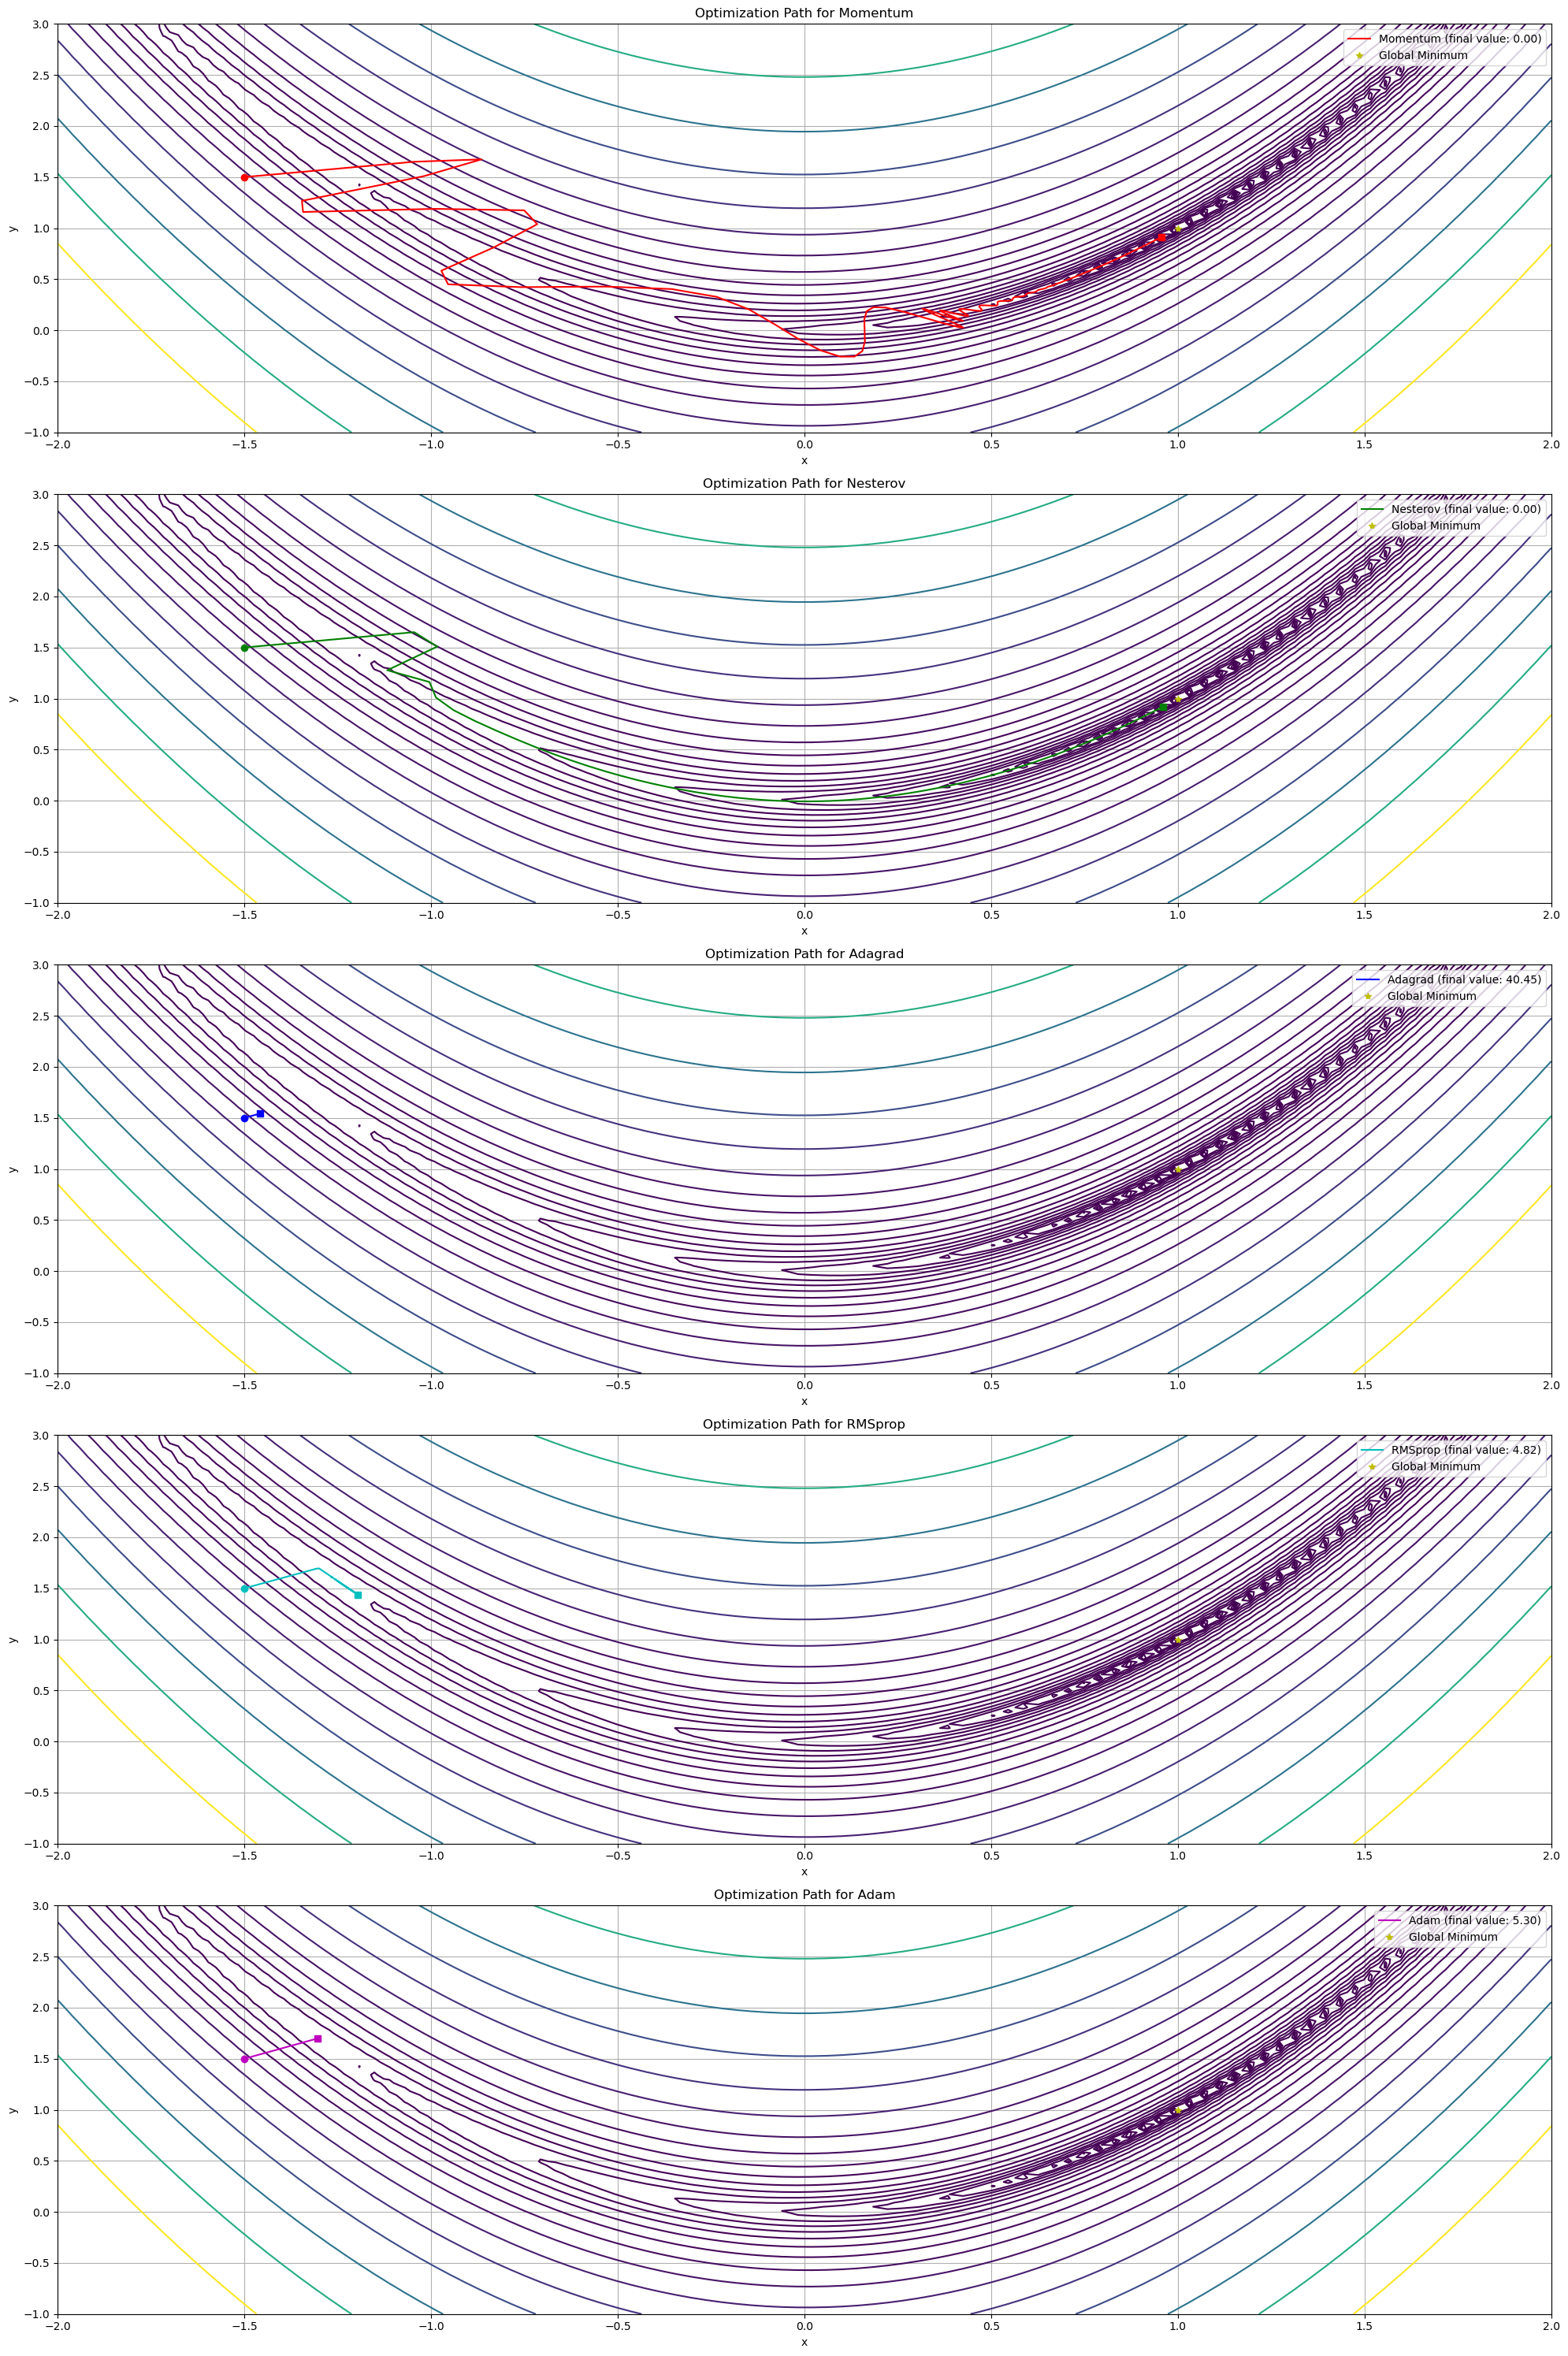


Final Results:
--------------------------------------------------
Momentum:
  Final point: (0.9567, 0.9152)
Nesterov:
  Final point: (0.9590, 0.9196)
Adagrad:
  Final point: (-1.4588, 1.5414)
RMSprop:
  Final point: (-1.1953, 1.4362)
Adam:
  Final point: (-1.3029, 1.6973)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def rosenbrock_gradient(x, y):
    dx = -2 * (1 - x) - 400 * x * (y - x**2)
    dy = 200 * (y - x**2)
    return np.array([dx, dy])

class Optimizer:
    def __init__(self, learning_rate=0.001, beta=0.9):
        self.lr = learning_rate
        self.beta = beta
        self.iterations = []

    def optimize(self, start_point, n_iterations):
        raise NotImplementedError

class MomentumGD(Optimizer):
    def optimize(self, start_point, n_iterations):
        point = np.array(start_point, dtype=float)
        velocity = np.zeros_like(point)
        self.iterations = [point.copy()]

        for _ in range(n_iterations):
            grad = rosenbrock_gradient(point[0], point[1])
            velocity = self.beta * velocity - self.lr * grad
            point += velocity
            self.iterations.append(point.copy())

        return point, self.iterations

class NesterovGD(Optimizer):
    def optimize(self, start_point, n_iterations):
        point = np.array(start_point, dtype=float)
        velocity = np.zeros_like(point)
        self.iterations = [point.copy()]

        for _ in range(n_iterations):
            look_ahead = point + self.beta * velocity
            grad = rosenbrock_gradient(look_ahead[0], look_ahead[1])
            velocity = self.beta * velocity - self.lr * grad
            point += velocity
            self.iterations.append(point.copy())

        return point, self.iterations

class Adagrad(Optimizer):
    def optimize(self, start_point, n_iterations):
        point = np.array(start_point, dtype=float)
        accumulated_grad = np.zeros_like(point)
        epsilon = 1e-8
        self.iterations = [point.copy()]

        for _ in range(n_iterations):
            grad = rosenbrock_gradient(point[0], point[1])
            accumulated_grad += grad**2
            point -= self.lr * grad / (np.sqrt(accumulated_grad) + epsilon)
            self.iterations.append(point.copy())

        return point, self.iterations

class RMSprop(Optimizer):
    def optimize(self, start_point, n_iterations):
        point = np.array(start_point, dtype=float)
        accumulated_grad = np.zeros_like(point)
        epsilon = 1e-8
        self.iterations = [point.copy()]

        for _ in range(n_iterations):
            grad = rosenbrock_gradient(point[0], point[1])
            accumulated_grad = self.beta * accumulated_grad + (1 - self.beta) * grad**2
            point -= self.lr * grad / (np.sqrt(accumulated_grad) + epsilon)
            self.iterations.append(point.copy())

        return point, self.iterations

class Adam(Optimizer):
    def optimize(self, start_point, n_iterations):
        point = np.array(start_point, dtype=float)
        m = np.zeros_like(point)
        v = np.zeros_like(point)
        epsilon = 1e-8
        beta2 = 0.999
        self.iterations = [point.copy()]

        for t in range(1, n_iterations + 1):
            grad = rosenbrock_gradient(point[0], point[1])

            m = self.beta * m + (1 - self.beta) * grad
            v = beta2 * v + (1 - beta2) * grad**2

            m_hat = m / (1 - self.beta**t)
            v_hat = v / (1 - beta2**t)

            point -= self.lr * m_hat / (np.sqrt(v_hat) + epsilon)
            self.iterations.append(point.copy())

        return point, self.iterations

# Initialize parameters
start_point = (-1.5, 1.5)
n_iterations = 500
learning_rate = 0.001
beta = 0.9

# Create and run optimizers
optimizers = {
    'Momentum': MomentumGD(learning_rate, beta),
    'Nesterov': NesterovGD(learning_rate, beta),
    'Adagrad': Adagrad(learning_rate, beta),
    'RMSprop': RMSprop(learning_rate, beta),
    'Adam': Adam(learning_rate, beta)
}

results = {}
for name, optimizer in optimizers.items():
    final_point, iterations = optimizer.optimize(start_point, n_iterations)
    results[name] = {
        'final_point': final_point,
        'final_value': rosenbrock(*final_point),
        'iterations': np.array(iterations)
    }


fig, axes = plt.subplots(len(optimizers), 1, figsize=(10, 6 * len(optimizers)))

# Create contour plot of Rosenbrock function (shared across all subplots)
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

# Plot optimization paths for each optimizer
colors = ['r', 'g', 'b', 'c', 'm']
for i, ((name, result), color) in enumerate(zip(results.items(), colors)):
    ax = axes[i] if len(optimizers) > 1 else axes  # Handle single optimizer case
    path = result['iterations']

    # Contour plot of the Rosenbrock function
    ax.contour(X, Y, Z, levels=np.logspace(-1, 3, 20))

    # Plot the optimization path
    ax.plot(path[:, 0], path[:, 1], color=color, label=f"{name} (final value: {result['final_value']:.2f})")
    ax.plot(path[0, 0], path[0, 1], color=color, marker='o')  # Start point
    ax.plot(path[-1, 0], path[-1, 1], color=color, marker='s')  # End point

    # Highlight the global minimum
    ax.plot(1, 1, 'y*', label='Global Minimum')

    # Add labels and title
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Optimization Path for {name}')
    ax.legend()
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

# Print final results
print("\nFinal Results:")
print("-" * 50)
for name, result in results.items():
    print(f"{name}:")
    print(f"  Final point: ({result['final_point'][0]:.4f}, {result['final_point'][1]:.4f})")